In [207]:
!pwd

/global/cscratch1/sd/ayanmitr/montepython_V3


In [208]:
#import corner

In [1274]:
! ls -lrt output/SNANA_plasticc_p/

total 18520
-rw-rw---- 1 ayanmitr ayanmitr     2749 Jun 19 20:47 log.param
-rw-rw---- 1 ayanmitr ayanmitr       69 Jun 19 20:47 2021-06-19_400000_.paramnames
-rw-rw---- 1 ayanmitr ayanmitr 15412720 Jun 20 04:28 2021-06-19_400000__1.txt
-rw-rw---- 1 ayanmitr ayanmitr       69 Jun 20 04:28 2021-06-20_400000_.paramnames
-rw-rw---- 1 ayanmitr ayanmitr  3522490 Jun 20 07:51 2021-06-20_400000__1.txt
-rw-rw---- 1 ayanmitr ayanmitr      337 Jun 20 07:52 SNANA_plasticc_p.log
-rw-rw---- 1 ayanmitr ayanmitr      184 Jun 20 07:52 SNANA_plasticc_p.covmat


In [1341]:
import getdist
import corner
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#from chainconsumer import ChainConsumer
#c = ChainConsumer()

#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#import sys, os
#sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples, paramnames
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import getdist
import IPython

In [4]:
! module load texlive

In [41]:
path = 'output/SNANA_plasticc_s/'

In [1225]:
! ls -lrt output/SNANA_plasticc_s/

total 35960
-rw-rw---- 1 ayanmitr ayanmitr     2749 Jun 18 10:45 log.param
-rw-rw---- 1 ayanmitr ayanmitr 13551857 Jun 18 18:37 2021-06-18_400000__1.txt
-rw-rw---- 1 ayanmitr ayanmitr       69 Jun 18 18:37 2021-06-18_400000_.paramnames
-rw-rw---- 1 ayanmitr ayanmitr 13574771 Jun 19 02:59 2021-06-18_400000__2.txt
-rw-rw---- 1 ayanmitr ayanmitr       69 Jun 19 02:59 2021-06-19_400000_.paramnames
-rw-rw---- 1 ayanmitr ayanmitr      445 Jun 19 09:58 SNANA_plasticc_s.log
-rw-rw---- 1 ayanmitr ayanmitr  9660957 Jun 19 09:58 2021-06-19_400000__1.txt


In [280]:
#tmp = paramnames.ParamNames(fileName=path+'2021-06-08_100000_.paramnames', 
 #                            setParamNameFile=None, default=0, names=None, labels=None)

In [201]:
param_names=[r'{\Omega}_{CDM}',r'w_0',r'w_0w_a','M',r'{\Omega}_m']
param_names2=[r'w_0',r'w_a','M',r'{\Omega}_m']
param_names3=[r'w_0',r'w_a','M']
param_names_short=[r'w_0',r'w_a','M',r'{\Omega}_m']

# Results : Systematics z<0.6

 Photoz

mean  [ -0.7296  -0.8981 -19.3496]
Shape  (283093, 3)
Removed no burn in
Spectroz
mean  [ -0.9519  -0.3393 -19.4002]
Shape  (550938, 3)
Removed no burn in


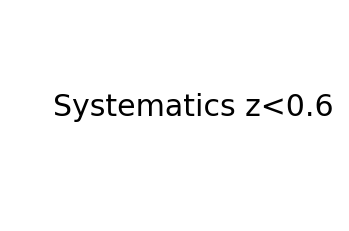

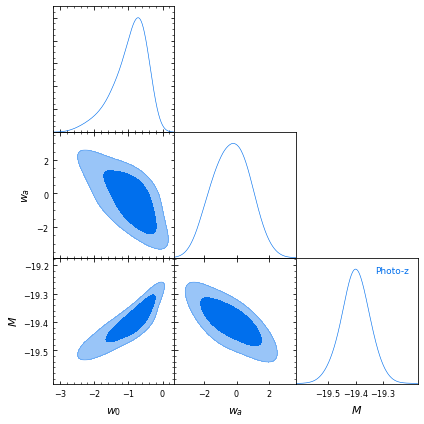

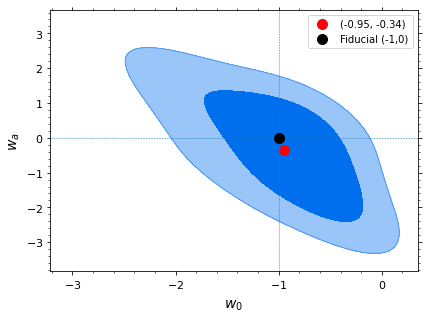

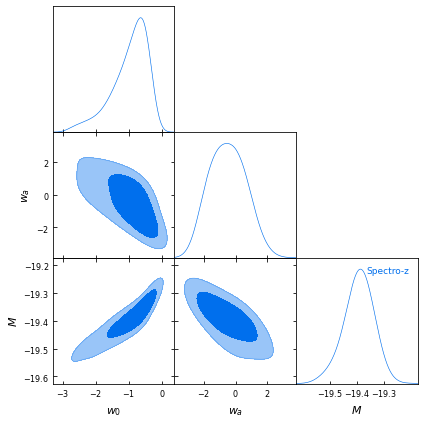

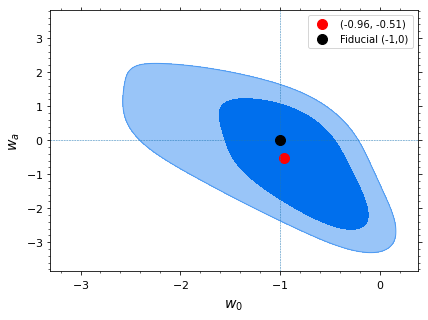

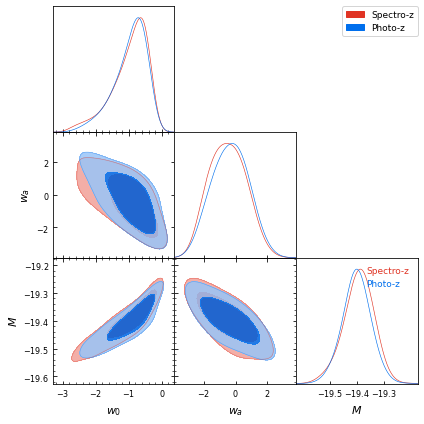

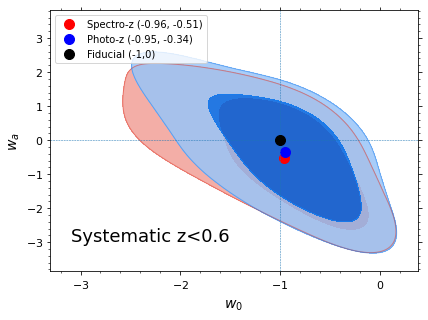

In [1277]:
ident = 'sys_0_cov_r_6'

# Names of saved plots :
# 1 photoz_triangle, 2 photoz_single, 3 spectroz_triangle, 4 spectroz_single, 5 joint_triangle, 6 joint_w0wa
plot_path = 'output/plots/' 
#-----------------------------------------
# photo-z
types = 'photoz' 
path2= 'output/SNANA_plasticc_p/'
f5=path2+'2021-06-19_400000__1.txt'
f6=path2+'2021-06-20_400000__1.txt'
#f7=path2+'2021-06-17_400000__1.txt'
#f8=path2+'2021-06-13_400000__1.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# photometric input
chain_files = [f5,f6]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
#raww = raww[:93000,:] # 93000
#print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
#print('Photoz')
print("\033[1;32;43m Photoz\n") 
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

valuep3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
#print(valuep3)


raww3=raww2;ndim=3;

# Get Dist

#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples2 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Photo-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 
plt.scatter(0,0,c='white')  
plt.text(-0.04,0,'Systematics z<0.6',fontsize=30)
plt.axis('off')

g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True); 
for ax in g.subplots[:,0]:
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()    

g.add_legend(['Photo-z'], colored_text=True,legend_loc='upper right')
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples2], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples2['x0'].mean(),samples2['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples2['x0'].mean(),samples2['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC OLD'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

# =------------------------------------------------------------------------------------------------------------

# spectro-z
types = 'spectroz' 
path2= 'output/SNANA_plasticc_s_sys_0_cov_r_6/' # spectro no sys not yet done. 
f5=path2+'2021-06-18_400000__1.txt'
f6=path2+'2021-06-18_400000__2.txt'
f7=path2+'2021-06-19_400000__1.txt'
#f8=path2+'2021-06-15_70000__4.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# spectroscopic input
chain_files = [f5,f6,f7]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
#raww = raww[:70000,:] #187350
#print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
print('Spectroz')
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

values3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
#print(valuep3)


raww3=raww2;ndim=3;

# Get Dist

#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples1 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Spectro-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 

g = plots.get_subplot_plotter();
g.triangle_plot([samples1], filled=True); 

g.add_legend(['Spectro-z'], colored_text=True,legend_loc='upper right')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')


g = plots.get_single_plotter()
g.plot_2d([samples1], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples1['x0'].mean(),samples1['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples1['x0'].mean(),samples1['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC S'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

#--------------------------------------------------
# Joint : Spectro + Photo
types = 'joint'
samples5=samples1; samples6=samples2;

g = plots.get_subplot_plotter()
g.triangle_plot([samples1,samples2], filled=True)    
g.add_legend(['Spectro-z','Photo-z'], colored_text=True,legend_loc='upper right');
for ax in g.subplots[-1:,0]:
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')

# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples1, samples2], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples1['x0'].mean(),samples1['x1'].mean(),'o',c='r',markersize=10, label='Spectro-z (%.2f, %.2f)'%(samples1['x0'].mean(),samples1['x1'].mean()))
    ax.plot(samples2['x0'].mean(),samples2['x1'].mean(),'o',c='b',markersize=10, label='Photo-z (%.2f, %.2f)'%(samples2['x0'].mean(),samples2['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    ax.text(-3.1,-3,'Systematic z<0.6',fontsize=18)
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
   
#g.add_y_bands(0, 1)
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

# Results : Systematics z>0.6

 Photoz

mean  [ -0.7296  -0.8981 -19.3496]
Shape  (93000, 3)
Removed no burn in
Spectroz
mean  [ -1.1952  -0.1558 -19.5033]
Shape  (186000, 3)
Removed no burn in


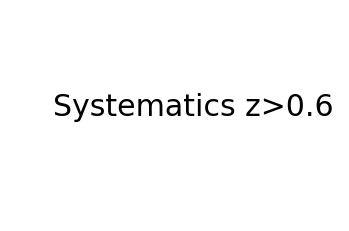

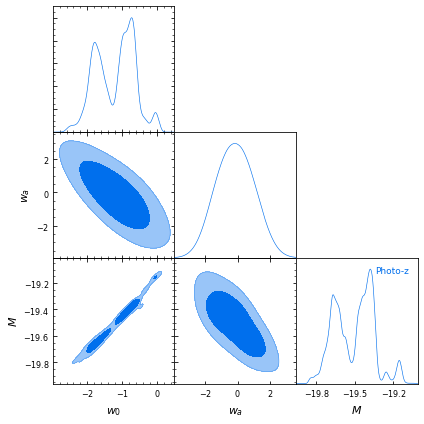

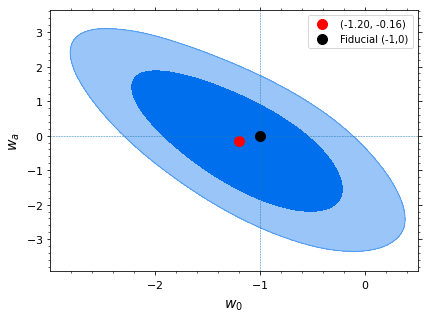

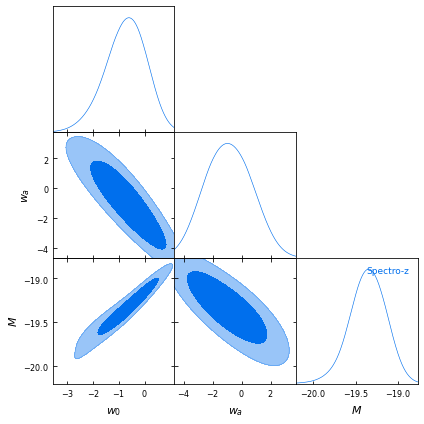

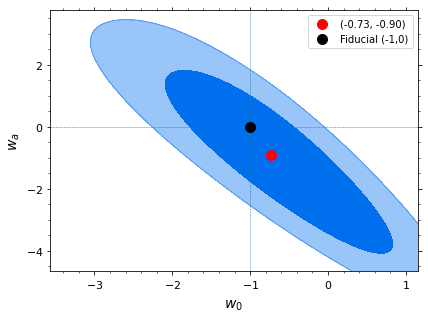

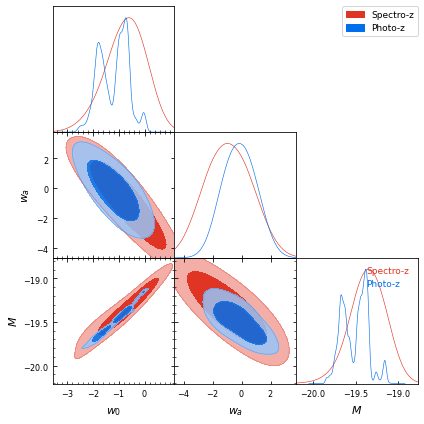

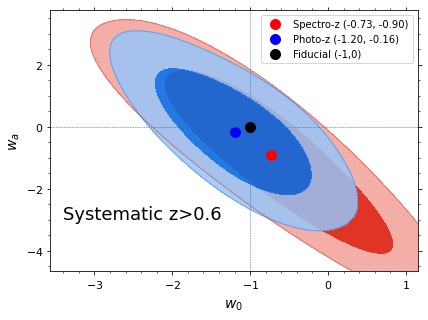

In [1360]:
ident = 'sys_0_cov_6'

# Names of saved plots :
# 1 photoz_triangle, 2 photoz_single, 3 spectroz_triangle, 4 spectroz_single, 5 joint_triangle, 6 joint_w0wa
plot_path = 'output/plots/' 
#-----------------------------------------
# photo-z
types = 'photoz' 
path2= 'output/SNANA_plasticc_p_sys_0_cov_6/'
f5=path2+'2021-06-16_400000__1.txt'
f6=path2+'2021-06-16_400000__2.txt'
f7=path2+'2021-06-17_400000__1.txt'
#f8=path2+'2021-06-13_400000__1.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# photometric input
chain_files = [f5,f6,f7]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
raww = raww[:93000,:] # 93000
#print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
print("\033[1;30;41m Photoz\n") 
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

valuep3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
#print(valuep3)


raww3=raww2;ndim=3;

# Get Dist

#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples2 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Photo-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 
plt.scatter(0,0,c='white')  
plt.text(-0.04,0,'Systematics z>0.6',fontsize=30)
plt.axis('off')

g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True); 
for ax in g.subplots[:,0]:
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()    

g.add_legend(['Photo-z'], colored_text=True,legend_loc='upper right')
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples2], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples2['x0'].mean(),samples2['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples2['x0'].mean(),samples2['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC OLD'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

# =------------------------------------------------------------------------------------------------------------

# spectro-z
types = 'spectroz' 
path2= 'output/SNANA_plasticc_s_sys_0_cov_6/' # spectro no sys not yet done. 
f5=path2+'2021-06-17_400000__1.txt'
f6=path2+'2021-06-17_400000__2.txt'
f7=path2+'2021-06-17_400000__3.txt'
#f8=path2+'2021-06-15_70000__4.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# spectroscopic input
chain_files = [f5,f6,f7]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
raww = raww[:186000,:] #187350
#print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
print('Spectroz')
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

values3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
#print(valuep3)


raww3=raww2;ndim=3;

# Get Dist

#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples1 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Spectro-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 

g = plots.get_subplot_plotter();
g.triangle_plot([samples1], filled=True); 

g.add_legend(['Spectro-z'], colored_text=True,legend_loc='upper right')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')


g = plots.get_single_plotter()
g.plot_2d([samples1], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples1['x0'].mean(),samples1['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples1['x0'].mean(),samples1['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC S'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

#--------------------------------------------------
# Joint : Spectro + Photo
types = 'joint'
samples3=samples1; samples4=samples2;

g = plots.get_subplot_plotter()
g.triangle_plot([samples1,samples2], filled=True)    
g.add_legend(['Spectro-z','Photo-z'], colored_text=True,legend_loc='upper right');
for ax in g.subplots[-1:,0]:
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')

# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples1, samples2], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples1['x0'].mean(),samples1['x1'].mean(),'o',c='r',markersize=10, label='Spectro-z (%.2f, %.2f)'%(samples1['x0'].mean(),samples1['x1'].mean()))
    ax.plot(samples2['x0'].mean(),samples2['x1'].mean(),'o',c='b',markersize=10, label='Photo-z (%.2f, %.2f)'%(samples2['x0'].mean(),samples2['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    ax.text(-3.4,-3,'Systematic z>0.6',fontsize=18)
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
   
#g.add_y_bands(0, 1)
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

# Results : No Systematics

Photoz
mean  [ -0.7151  -0.1819 -19.3793]
Shape  (108923, 3)
Removed no burn in


Spectroz
mean  [ -1.0916  -0.374  -19.4742]
Shape  (73000, 3)
Removed no burn in


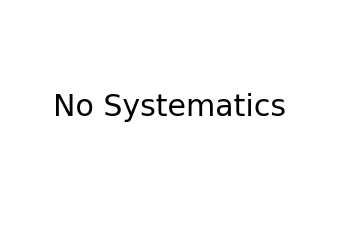

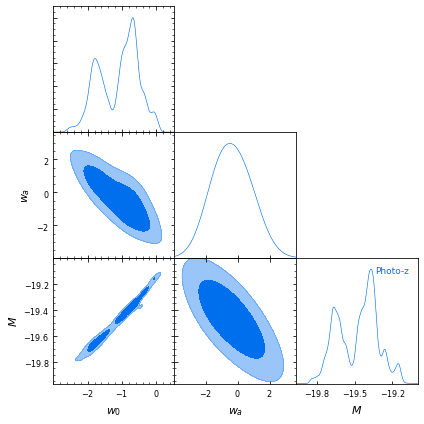

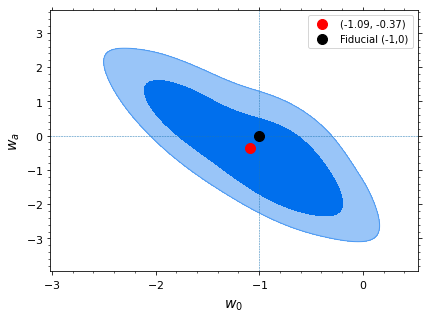

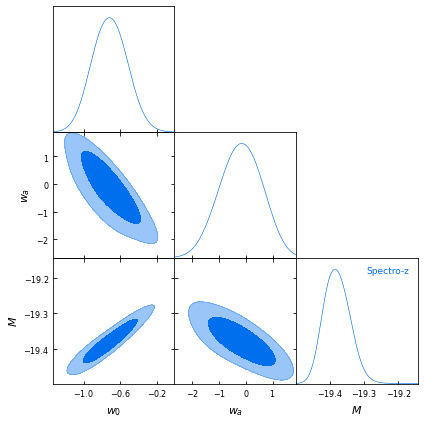

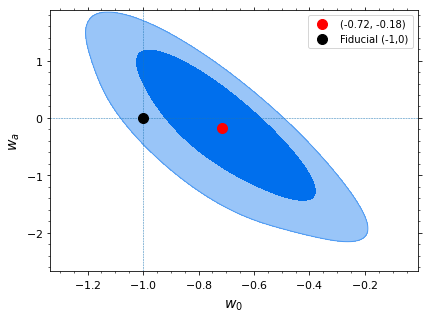

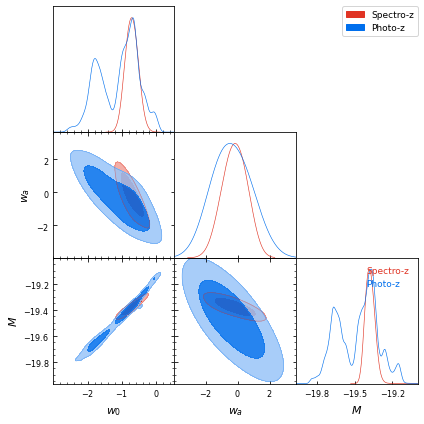

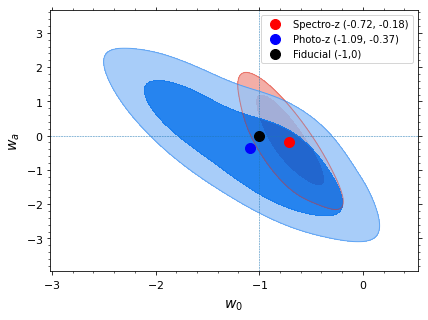

In [1110]:
ident = 'no_sys'

# Names of saved plots :
# 1 photoz_triangle, 2 photoz_single, 3 spectroz_triangle, 4 spectroz_single, 5 joint_triangle, 6 joint_w0wa
plot_path = 'output/plots/' 
#-----------------------------------------
# photo-z
types = 'photoz' 
path2= 'output/SNANA_plasticc_p/'
f5=path2+'2021-06-16_400000__1.txt'
f6=path2+'2021-06-16_400000__2.txt'
f7=path2+'2021-06-17_400000__1.txt'
#f8=path2+'2021-06-13_400000__1.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# photometric input
chain_files = [f5,f6,f7]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
#raww = raww[:93000,:] # 93000
#print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
print('Photoz')
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

valuep3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
#print(valuep3)


raww3=raww2;ndim=3;

# Get Dist

#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples2 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Photo-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 
plt.scatter(0,0,c='white')  
plt.text(-0.04,0,'No Systematics',fontsize=30)
plt.axis('off')

g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True); 
for ax in g.subplots[:,0]:
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()    

g.add_legend(['Photo-z'], colored_text=True,legend_loc='upper right')
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples2], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples2['x0'].mean(),samples2['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples2['x0'].mean(),samples2['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC OLD'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

# =------------------------------------------------------------------------------------------------------------

# spectro-z
types = 'spectroz' 
path2= 'output/SNANA_plasticc_s_all_sys/' # spectro no sys not yet done. 
f5=path2+'2021-06-15_400000__1.txt'
f6=path2+'2021-06-15_400000__2.txt'
#f7=path2+'2021-06-15_70000__3.txt'
#f8=path2+'2021-06-15_70000__4.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# spectroscopic input
chain_files = [f5,f6]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
raww = raww[:73000,:]
#print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
print('Spectroz')
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

values3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
#print(valuep3)


raww3=raww2;ndim=3;

# Get Dist

#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples1 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Spectro-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 

g = plots.get_subplot_plotter();
g.triangle_plot([samples1], filled=True); 

g.add_legend(['Spectro-z'], colored_text=True,legend_loc='upper right')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')


g = plots.get_single_plotter()
g.plot_2d([samples1], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples1['x0'].mean(),samples1['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples1['x0'].mean(),samples1['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC S'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

#--------------------------------------------------
# Joint : Spectro + Photo
types = 'joint'
samples3=samples1; samples4=samples2;

g = plots.get_subplot_plotter()
g.triangle_plot([samples1,samples2], filled=True)    
g.add_legend(['Spectro-z','Photo-z'], colored_text=True,legend_loc='upper right');
for ax in g.subplots[-1:,0]:
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')

# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples1, samples2], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples1['x0'].mean(),samples1['x1'].mean(),'o',c='r',markersize=10, label='Spectro-z (%.2f, %.2f)'%(samples1['x0'].mean(),samples1['x1'].mean()))
    ax.plot(samples2['x0'].mean(),samples2['x1'].mean(),'o',c='b',markersize=10, label='Photo-z (%.2f, %.2f)'%(samples2['x0'].mean(),samples2['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
   
#g.add_y_bands(0, 1)
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

# Results : all systematics

 Photoz

mean  [ -0.7151  -0.1819 -19.3793]
Shape  (89764, 3)
Removed no burn in
Spectroz
mean  [ -0.7287  -0.749  -19.3791]
Shape  (73000, 3)
Removed no burn in


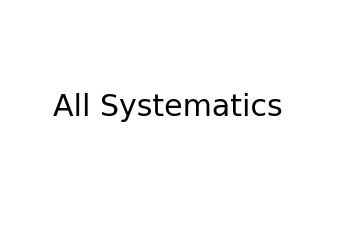

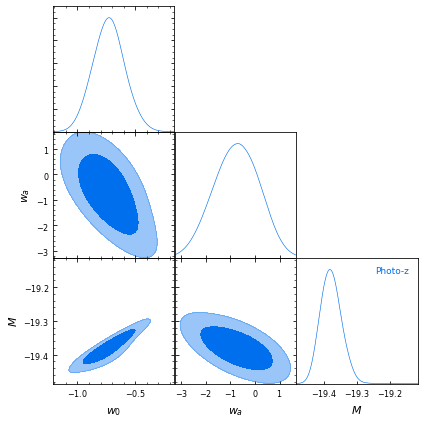

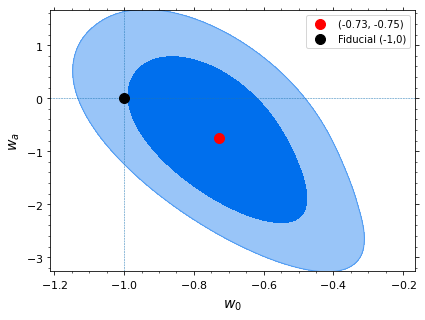

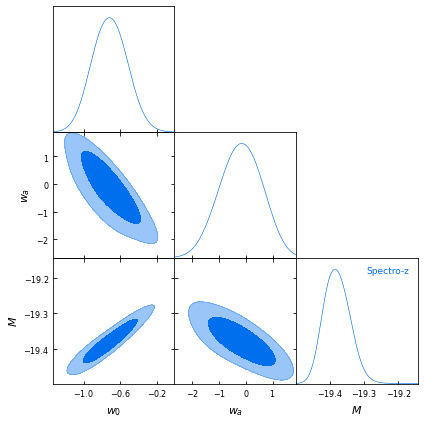

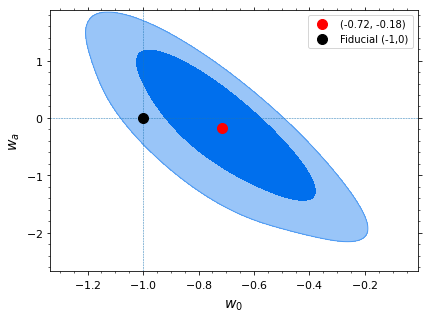

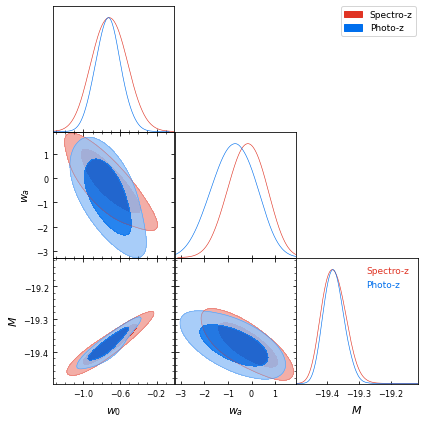

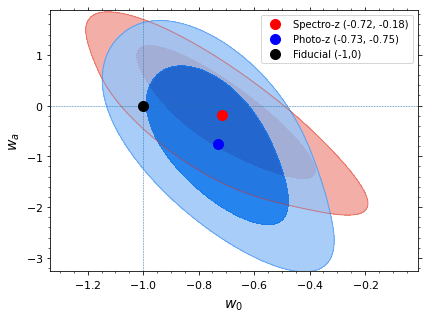

In [1364]:
ident = 'all_sys'

# Names of saved plots :
# 1 photoz_triangle, 2 photoz_single, 3 spectroz_triangle, 4 spectroz_single, 5 joint_triangle, 6 joint_w0wa
plot_path = 'output/plots/' 
#-----------------------------------------
# photo-z
types = 'photoz' 
path2= 'output/SNANA_plasticc_p_all_sys/'
f5=path2+'2021-06-14_400000__1.txt'
f6=path2+'2021-06-14_400000__2.txt'
f7=path2+'2021-06-15_400000__1.txt'
#f8=path2+'2021-06-12_400000__4.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# photometric input
chain_files = [f5,f6,f7]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
#print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
print("\033[1;32;43m Photoz\n") 
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

valuep3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
#print(valuep3)


raww3=raww2;ndim=3;

# Get Dist

#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples2 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Photo-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 
plt.scatter(0,0,c='white')  
plt.text(-0.04,0,'All Systematics',fontsize=30)
plt.axis('off')    
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True); 
for ax in g.subplots[:,0]:
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()    

g.add_legend(['Photo-z'], colored_text=True,legend_loc='upper right')
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples2], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples2['x0'].mean(),samples2['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples2['x0'].mean(),samples2['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC OLD'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

# =------------------------------------------------------------------------------------------------------------

# spectro-z
types = 'spectroz' 
path2= 'output/SNANA_plasticc_s_all_sys/'
f5=path2+'2021-06-15_400000__1.txt'
f6=path2+'2021-06-15_400000__2.txt'
#f7=path2+'2021-06-15_70000__3.txt'
#f8=path2+'2021-06-15_70000__4.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# spectroscopic input
chain_files = [f5,f6]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
raww = raww[:73000,:]
#print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
print('Spectroz')
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

values3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
#print(valuep3)


raww3=raww2;ndim=3;

# Get Dist

#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples1 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Spectro-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 
    
g = plots.get_subplot_plotter();
g.triangle_plot([samples1], filled=True); 

g.add_legend(['Spectro-z'], colored_text=True,legend_loc='upper right')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
#plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')


g = plots.get_single_plotter()
g.plot_2d([samples1], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples1['x0'].mean(),samples1['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples1['x0'].mean(),samples1['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC S'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

#--------------------------------------------------
# Joint : Spectro + Photo
types = 'joint'
samples01=samples1; samples02=samples2;

g = plots.get_subplot_plotter()
g.triangle_plot([samples1,samples2], filled=True)    
g.add_legend(['Spectro-z','Photo-z'], colored_text=True,legend_loc='upper right');
for ax in g.subplots[-1:,0]:
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
plt.savefig(plot_path+types+'_'+ident+'_traingle.pdf',bbox_inches='tight')

# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples1, samples2], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples1['x0'].mean(),samples1['x1'].mean(),'o',c='r',markersize=10, label='Spectro-z (%.2f, %.2f)'%(samples1['x0'].mean(),samples1['x1'].mean()))
    ax.plot(samples2['x0'].mean(),samples2['x1'].mean(),'o',c='b',markersize=10, label='Photo-z (%.2f, %.2f)'%(samples2['x0'].mean(),samples2['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
   
#g.add_y_bands(0, 1)
plt.legend() 
plt.savefig(plot_path+types+'_'+ident+'_single.pdf',bbox_inches='tight')

# Combined $w_0-w_a$ plot Photoz Comparison

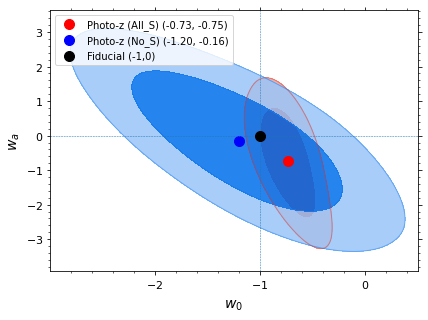

In [1339]:
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples02, samples4], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples02['x0'].mean(),samples02['x1'].mean(),'o',c='r',markersize=10, label='Photo-z (All_S) (%.2f, %.2f)'%(samples02['x0'].mean(),samples02['x1'].mean()))
    ax.plot(samples4['x0'].mean(),samples4['x1'].mean(),'o',c='b',markersize=10, label='Photo-z (No_S) (%.2f, %.2f)'%(samples4['x0'].mean(),samples4['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC OLD'], colored_text=True);
plt.legend() 

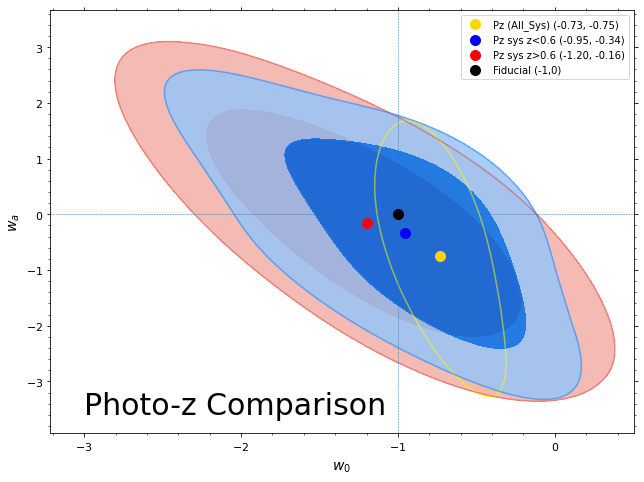

In [1404]:
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter(width_inch=9)
g.plot_2d([samples02, samples4,samples6], 'x0', 'x1',filled=True,colors=['yellow'])
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples02['x0'].mean(),samples02['x1'].mean(),'o',c='gold',markersize=10, label='Pz (All_Sys) (%.2f, %.2f)'%(samples02['x0'].mean(),samples02['x1'].mean()))
    ax.plot(samples6['x0'].mean(),samples6['x1'].mean(),'o',c='b',markersize=10, label='Pz sys z<0.6 (%.2f, %.2f)'%(samples6['x0'].mean(),samples6['x1'].mean()))
    ax.plot(samples4['x0'].mean(),samples4['x1'].mean(),'o',c='r',markersize=10, label='Pz sys z>0.6 (%.2f, %.2f)'%(samples4['x0'].mean(),samples4['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
    ax.text(-3.,-3.6,'Photo-z Comparison',fontsize=30)
    ax.text
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC OLD'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+'Photoz_Compare1.pdf',bbox_inches='tight')

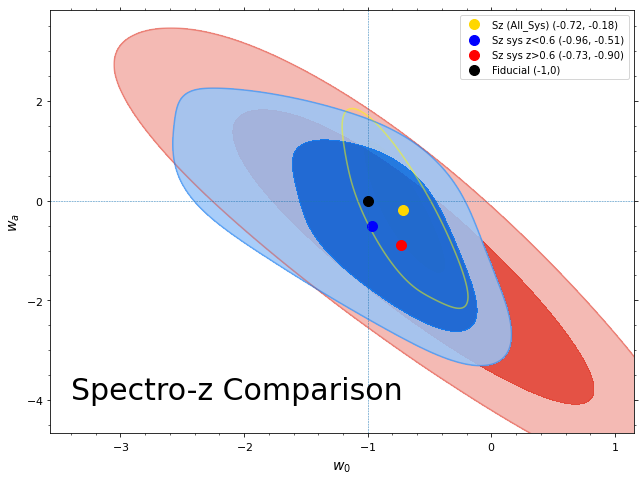

In [1401]:
# 2D line contour comparison plot with extra bands and markers
plot_path = 'output/plots/' 
g = plots.get_single_plotter(width_inch=9)
g.plot_2d([samples01, samples3,samples5], 'x0', 'x1',filled=True,colors=['yellow'])
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples01['x0'].mean(),samples01['x1'].mean(),'o',c='gold',markersize=10, label='Sz (All_Sys) (%.2f, %.2f)'%(samples01['x0'].mean(),samples01['x1'].mean()))
    ax.plot(samples5['x0'].mean(),samples5['x1'].mean(),'o',c='b',markersize=10, label='Sz sys z<0.6 (%.2f, %.2f)'%(samples5['x0'].mean(),samples5['x1'].mean()))
    ax.plot(samples3['x0'].mean(),samples3['x1'].mean(),'o',c='r',markersize=10, label='Sz sys z>0.6 (%.2f, %.2f)'%(samples3['x0'].mean(),samples3['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.minorticks_on()
    ax.text(-3.4,-4,'Spectro-z Comparison',fontsize=30)
    ax.text
    #ax.set_xlim(-1.1,-0.4);ax.set_ylim(-2.4,1.1)
   
#g.add_y_bands(0, 1)
#g.add_legend(['SNANA PLASTICC OLD'], colored_text=True);
plt.legend() 
#plt.savefig(plot_path+'Specz_Compare1.pdf',bbox_inches='tight')

# Spectroscopic Sample

(31585, 6)
mean  [ -0.722    0.1199 -19.3854]
[ -0.722    0.1199 -19.3854]
Photoz
Shape  (31585, 3)
Removed no burn in


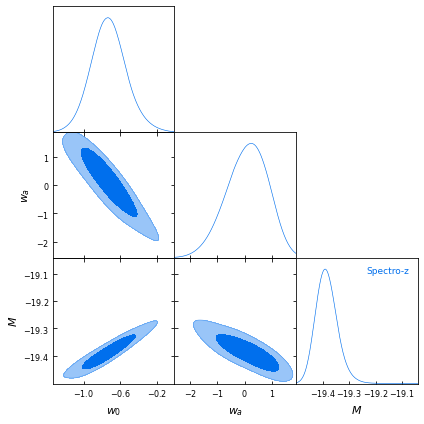

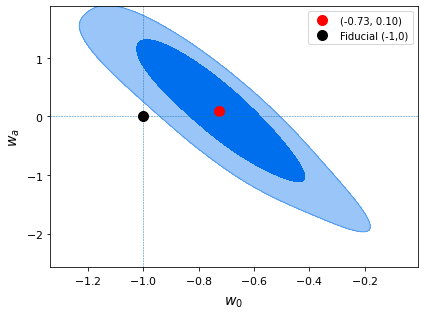

In [875]:
# Spectro-z
path2= 'output/SNANA_plasticc_s/'
f5=path2+'2021-06-15_400000__1.txt'
#f6=path2+'2021-06-14_400000__2.txt'
#f7=path2+'2021-06-15_400000__1.txt'
#f8=path2+'2021-06-12_400000__4.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# photometric input
chain_files = [f5]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

values3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
print(values3)


raww3=raww2;ndim=3;

# Get Dist
print('Photoz')
#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples1 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Spectro-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 
    
g = plots.get_subplot_plotter();
g.triangle_plot([samples1], filled=True); 

g.add_legend(['Spectro-z'], colored_text=True,legend_loc='upper right')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples1], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples1['x0'].mean(),samples1['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples1['x0'].mean(),samples1['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
   
#g.add_y_bands(0, 1)
g.add_legend(['SNANA PLASTICC S'], colored_text=True);
plt.legend() 
#plt.savefig(path2+'SNANA_p.pdf')

# Photometric Sample

(89760, 6)
mean  [ -0.8504  -0.0998 -19.3866]
[ -0.8504  -0.0998 -19.3866]
Photoz
Shape  (89760, 3)
Removed no burn in


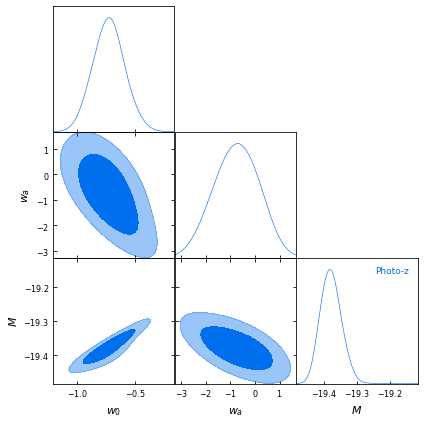

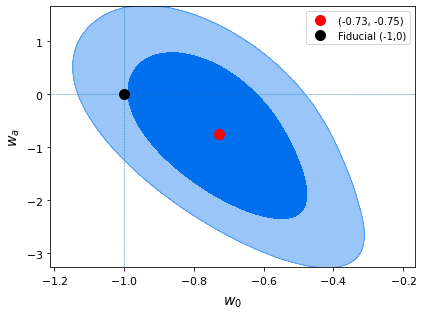

In [749]:
# photo-z
path2= 'output/SNANA_plasticc_p_all_sys/'
f5=path2+'2021-06-14_400000__1.txt'
f6=path2+'2021-06-14_400000__2.txt'
f7=path2+'2021-06-15_400000__1.txt'
#f8=path2+'2021-06-12_400000__4.txt'
#f9=path2+'2021-06-09_100000__1.txt'
#f10=path2+'2021-06-09_200000__1.txt'

# photometric input
chain_files = [f5,f6,f7]#,'[f1,f2][modelb_chain_zeta0_n.txt','modelc_chain_zeta0_n.txt']
n = 6
new = np.empty(shape=[0, n])
i=0
for chain_file in chain_files:
    raww = np.loadtxt(chain_file)
    new = np.concatenate([new,raww])
raww = new  
raww[:,4] = raww[:,4]-raww[:,3]
print(np.shape(raww))

valuep2 = np.round(np.mean(raww[:,2:], axis=0),decimals=4) # from sample
valuep_sd = np.std(raww[:,2:], axis=0) # from sample


# we only want w0, M, om

raww2 = (raww[:,1:])
#wa = (raww2[:,3]-raww2[:,2])
#wa[:,None].shape
#raww2 = (np.delete(raww2, 0, 1) ) # removing w0_wa
print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))
#raww3 = np.append(raww3, wa[:,None], axis=1)
#print('mean ',np.round(np.mean(raww3[:,2:], axis=0),decimals=4))

valuep3 = np.round(np.mean(raww3[:,2:], axis=0),decimals=4) # from sample
print(valuep3)


raww3=raww2;ndim=3;

# Get Dist
print('Photoz')
#ndim=3
names = ["x%s"%i for i in range(ndim)];
labels =  ["x_%s"%i for i in range(ndim)];
#print(labels,names)
print('Shape ',np.shape(raww3[:,2:]));
samples2 = MCSamples(samples=raww3[:,2:],names = names, labels = param_names3,label='Photo-z');
#samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')
'''
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True);
for ax in g.subplots[-1,:-1]:
    ax.axhline(0.3, color='gray', ls='--');
    ax.axvline(-1, color='gray', ls='--');

''' 
    
g = plots.get_subplot_plotter();
g.triangle_plot([samples2], filled=True); 

g.add_legend(['Photo-z'], colored_text=True,legend_loc='upper right')
#'''
# 2D line contour comparison plot with extra bands and markers
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples2], 'x0', 'x1',filled=True)
#g.add_x_marker(0)

for ax in g.subplots[-1:,0]:
    ax.plot(samples2['x0'].mean(),samples2['x1'].mean(),'o',c='r',markersize=10, label='(%.2f, %.2f)'%(samples2['x0'].mean(),samples2['x1'].mean()))
    ax.axvline(-1,linestyle='--',linewidth=0.5)
    ax.axhline(0,linestyle='--',linewidth=0.5)
    ax.plot(-1,0.,'o',markersize=10,c='black',label='Fiducial (-1,0)')
    #ax.set_xlim(-5,5);ax.set_ylim(-3,3.4)
   
#g.add_y_bands(0, 1)
g.add_legend(['SNANA PLASTICC OLD'], colored_text=True);
plt.legend() 
#plt.savefig(path2+'SNANA_p.pdf')

# Combined $w_0-w_a$ plot

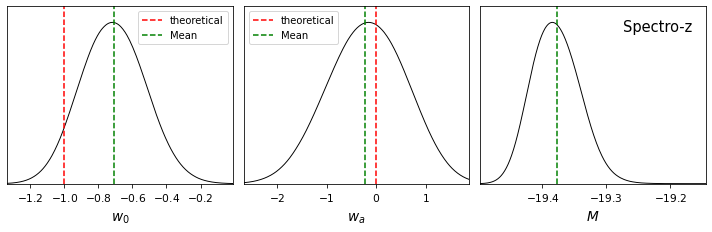

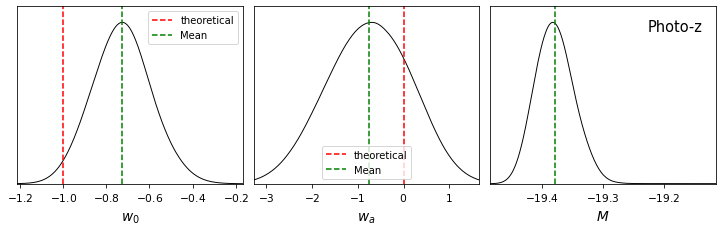

In [923]:
# Multiple 1D subplots
g = plots.get_subplot_plotter(width_inch=10)
g.plots_1d(samples1, ['x0', 'x1', 'x2'], nx=3);
for ax in g.subplots[-1:,0]:
    ax.axvline(-1.0,c='r',linestyle='--',label='theoretical')
    ax.axvline(valuep3[0],c='g',linestyle='--',label='Mean')
    ax.legend()
for ax in g.subplots[-1:,1]:
    ax.axvline(0,c='r',linestyle='--',label='theoretical')
    ax.axvline(valuep3[1],c='g',linestyle='--',label='Mean')
    ax.legend()
for ax in g.subplots[-1:,2]:
    #ax.axvline(0,c='r',linestyle='--',label='theoretical')
    ax.axvline(valuep3[2],c='g',linestyle='--',label='Mean')
    ax.legend()
g.add_legend(['Spectro-z'], colored_text=True,legend_loc='upper right',fontsize=15)
g.plots_1d(samples2, ['x0', 'x1', 'x2'], nx=3);g.add_legend(['Photo-z'], colored_text=True,legend_loc='upper right')
for ax in g.subplots[-1:,0]:
    ax.axvline(-1.0,c='r',linestyle='--',label='theoretical')
    ax.axvline(values3[0],c='g',linestyle='--',label='Mean')
    ax.legend()
for ax in g.subplots[-1:,1]:
    ax.axvline(0,c='r',linestyle='--',label='theoretical')
    ax.axvline(values3[1],c='g',linestyle='--',label='Mean')
    ax.legend()
for ax in g.subplots[-1:,2]:
    #ax.axvline(0,c='r',linestyle='--',label='theoretical')
    ax.axvline(values3[2],c='g',linestyle='--',label='Mean')
    ax.legend()
g.add_legend(['Photo-z'], colored_text=True,legend_loc='upper right',fontsize=15)    

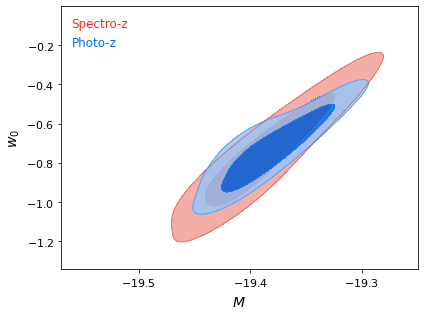

In [888]:
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples1,samples2], 'x2', 'x0',filled=True)

for ax in g.subplots[-1:,0]:
    #ax.set_ylim(-1.2,-0.1)
    ax.set_xlim(-19.57,-19.25)
    #ax.axhline(-1,linestyle='--',linewidth=0.6,c='black')
    #ax.axvline(0.3,linestyle='--',linewidth=0.6,c='black')
#g.plot_2d([samples2], 'x2', 'x0',filled=True)    
#g.add_y_bands(0, -.6)
g.add_legend(['Spectro-z','Photo-z'], colored_text=True,legend_loc='upper left');

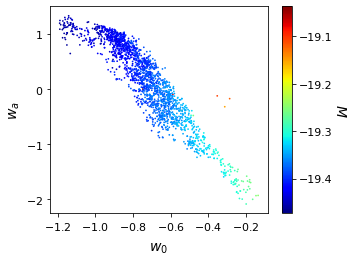

In [873]:
# 2D scatter (3D) plot
g = plots.get_single_plotter(width_inch=5)
g.plot_3d(samples1, ['x0', 'x1', 'x2'])

(24535, 5)

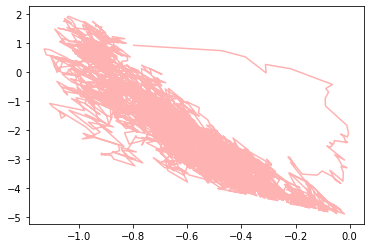

In [809]:
plt.plot(raw3[:,2],raw3[:,3]-raw3[:,2],c='r',alpha=0.3)
np.shape(raww[:,1:])